# CTM MILP Formulation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint
import time

from ctmmodels.const import *
from ctmmodels.altphasing import Constraint6AltPhasingModel

## Constants

In [2]:
FLOW_UNDERSAT       = 450 # veh / hr / lane
FLOW_SAT            = 600 
FLOW_OVERSAT        = 900

Timesteps : Running Time
10        : 0.32
20        : 7.18

## Using the Module

In [3]:
# model1 = Constraint5Model(
#     sat_flow_rate=600,
#     demand=450,
# )
# model1.generate()

model2 = Constraint6AltPhasingModel(
    sat_flow_rate=600,
    demand=450,
)
model2.generate()

In [4]:
print("Old:")
model1.solve(log_output=True)

Old:


NameError: name 'model1' is not defined

In [5]:
print("New:")
model2.solve(log_output=True)

New:
Solving...
CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve eliminated 2264 rows and 292 columns.
MIP Presolve modified 904 coefficients.
Aggregator did 340 substitutions.
Reduced MIP has 2938 rows, 1648 columns, and 11088 nonzeros.
Reduced MIP has 240 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (13.65 ticks)
Found incumbent of value 1860.000000 after 0.04 sec. (30.58 ticks)
Probing fixed 0 vars, tightened 137 bounds.
Probing time = 0.00 sec. (0.57 ticks)
Tried aggregator 1 time.
MIP Presolve eliminated 544 rows and 136 columns.
MIP Presolve modified 8 coefficients.
Reduced MIP has 2394 rows, 1512 columns, and 9536 nonzeros.
Reduced MIP has 240 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (7.73 ticks)
Probing time = 0.00 sec. (1.20 ticks)
Clique table members: 120.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, usin

0.5770189762115479

Parameters: Timestep..Timerange, G_min..G_max, Inflow Demand

---

Parameters: 3..20, 2..5, 600

Old: 0.028

New: 3.745

---

Parameters: 1..20, 2..5, 600

Old: 12.471

New: 11.575

---

Parameters: 1..20, 2..5, 900

Old: 7.483

New: 3.829

## Showing the Cell Capacities

In [6]:
model = model2

In [7]:
df_x, df_y, df_g = model.return_solution()

In [8]:
df_x_source = df_x[df_x.cell == (CELL_SOURCE,0,1)].sort_values(by='timestep')
df_x_normal0 = df_x[df_x.cell == (CELL_NORMAL,0,1)].sort_values(by='timestep')
df_x_normal1 = df_x[df_x.cell == (CELL_NORMAL,1,1)].sort_values(by='timestep')
df_x_normal2 = df_x[df_x.cell == (CELL_NORMAL,2,1)].sort_values(by='timestep')
df_x_left = df_x[df_x.cell == (CELL_MOVEMENT,THROUGH_TURN,1)].sort_values(by='timestep')
df_x_sink = df_x[df_x.cell == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0]].sort_values(by='timestep')

df_x_approach = df_x_source.append(df_x_normal1).append(df_x_normal2).append(df_x_normal0).append(df_x_left).append(df_x_sink)
df_x_approach = df_x_approach.pivot(index='timestep', columns='cell', values='volume')
df_x_approach

cell,"(0, 0, 1)","(1, 0, 3)","(2, 1, 1)","(3, 0, 1)","(3, 1, 1)","(3, 2, 1)"
timestep,,,,,,
0,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
1,1.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000
2,1.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000
3,1.000000,0.000000,0.000000,1.000000,1.000000e+00,1.000000
4,1.166667,0.000000,0.666667,1.333333,5.000000e-01,1.166667
5,1.000000,0.666667,0.666667,1.166667,1.333333e+00,0.833333
6,2.000000,0.666667,0.666667,0.000000,1.166667e+00,1.333333
7,1.666667,0.666667,0.666667,1.333333,-1.662182e-08,1.666667
8,1.333333,0.666667,0.666667,1.333333,1.333333e+00,0.833333


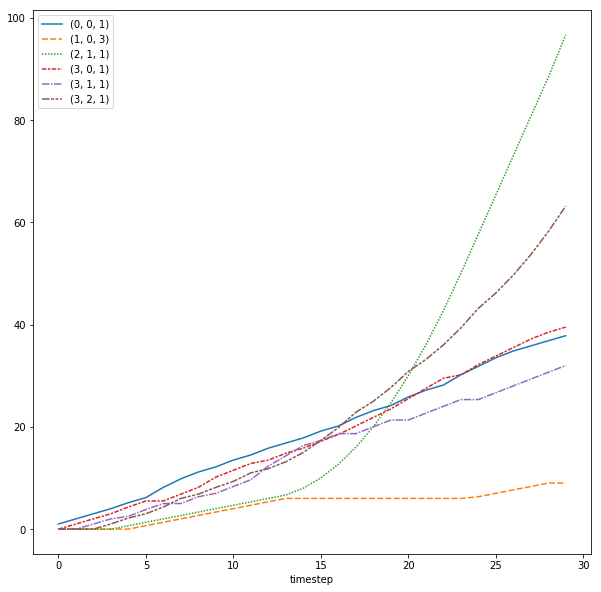

In [9]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_x_approach.cumsum())

This linear, cascading cumulative sum of consecutive cells (except for the through cell) means that the turning ratio is working fine.

In [10]:
df_y_source = df_y[df_y.cell_from == (CELL_SOURCE,0,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal0 = df_y[df_y.cell_from == (CELL_NORMAL,0,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal1 = df_y[df_y.cell_from == (CELL_NORMAL,1,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_normal2 = df_y[df_y.cell_from == (CELL_NORMAL,2,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_left = df_y[df_y.cell_from == (CELL_MOVEMENT,THROUGH_TURN,1)].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')
df_y_sink = df_y[df_y.cell_from == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0]].groupby(['cell_from', 'timestep']).agg({'flow': 'sum'}).sort_values(by='timestep')

df_y_approach = df_y_source.append(df_y_normal1).append(df_y_normal2).append(df_y_normal0).append(df_y_left).append(df_y_sink)
df_y_approach.reset_index(inplace=True)
df_y_approach = df_y_approach.pivot(index='timestep', columns='cell_from', values='flow')
df_y_approach

cell_from,"(0, 0, 1)","(2, 1, 1)","(3, 0, 1)","(3, 1, 1)","(3, 2, 1)"
timestep,,,,,
0,1.000000,0.000000,0.000000,0.000000,0.000000
1,1.000000,0.000000,1.000000,0.000000,0.000000
2,1.000000,0.000000,1.000000,1.000000,0.000000
3,0.833333,0.000000,0.500000,1.000000,0.833333
4,1.166667,0.666667,1.333333,0.500000,0.833333
5,0.000000,0.666667,1.166667,1.333333,0.833333
6,1.333333,0.666667,0.000000,1.166667,0.833333
7,1.333333,0.666667,1.333333,0.000000,0.833333
8,1.333333,0.666667,0.666667,1.333333,0.833333


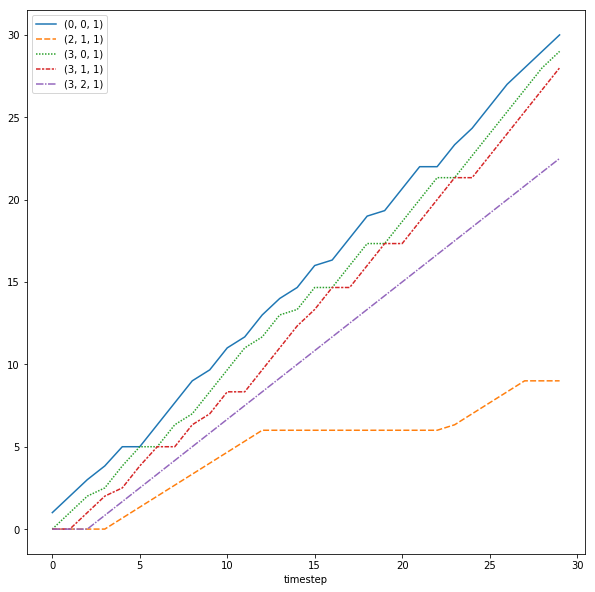

In [11]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_y_approach.cumsum())

### Comparing the Green Signal and the Flow

In [12]:
df_g_specific = df_g[df_g.cell == (1,0,1)].sort_values(by='timestep')
df_g_specific.cell = df_g_specific.cell.apply(lambda x: (CELL_MOVEMENT,THROUGH_TURN,1))
df_y_specific = df_y[(df_y.cell_from == (CELL_MOVEMENT,THROUGH_TURN,1)) & (df_y.cell_to == model.S[(CELL_MOVEMENT,THROUGH_TURN,1)][0])].sort_values(by='timestep')
df_y_specific = df_y_specific.groupby(['timestep', 'cell_from']).agg({'flow': 'sum'}).reset_index()

df_g_y = pd.merge(df_g_specific, df_y_specific, left_on=['timestep', 'cell'], right_on=['timestep', 'cell_from'])[
    ['timestep', 'is_green', 'flow']
]

df_g_y.set_index('timestep', inplace=True)

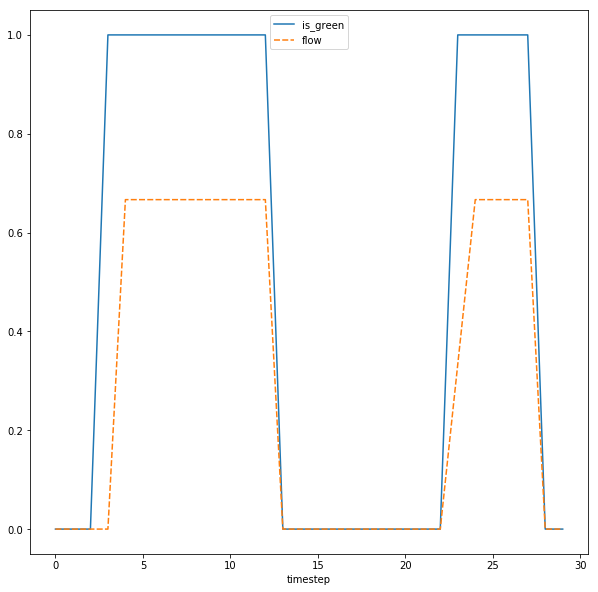

In [13]:
_, ax = plt.subplots(figsize=(10,10))
sns.lineplot(data=df_g_y)

## Checking the green times of the 8 phases

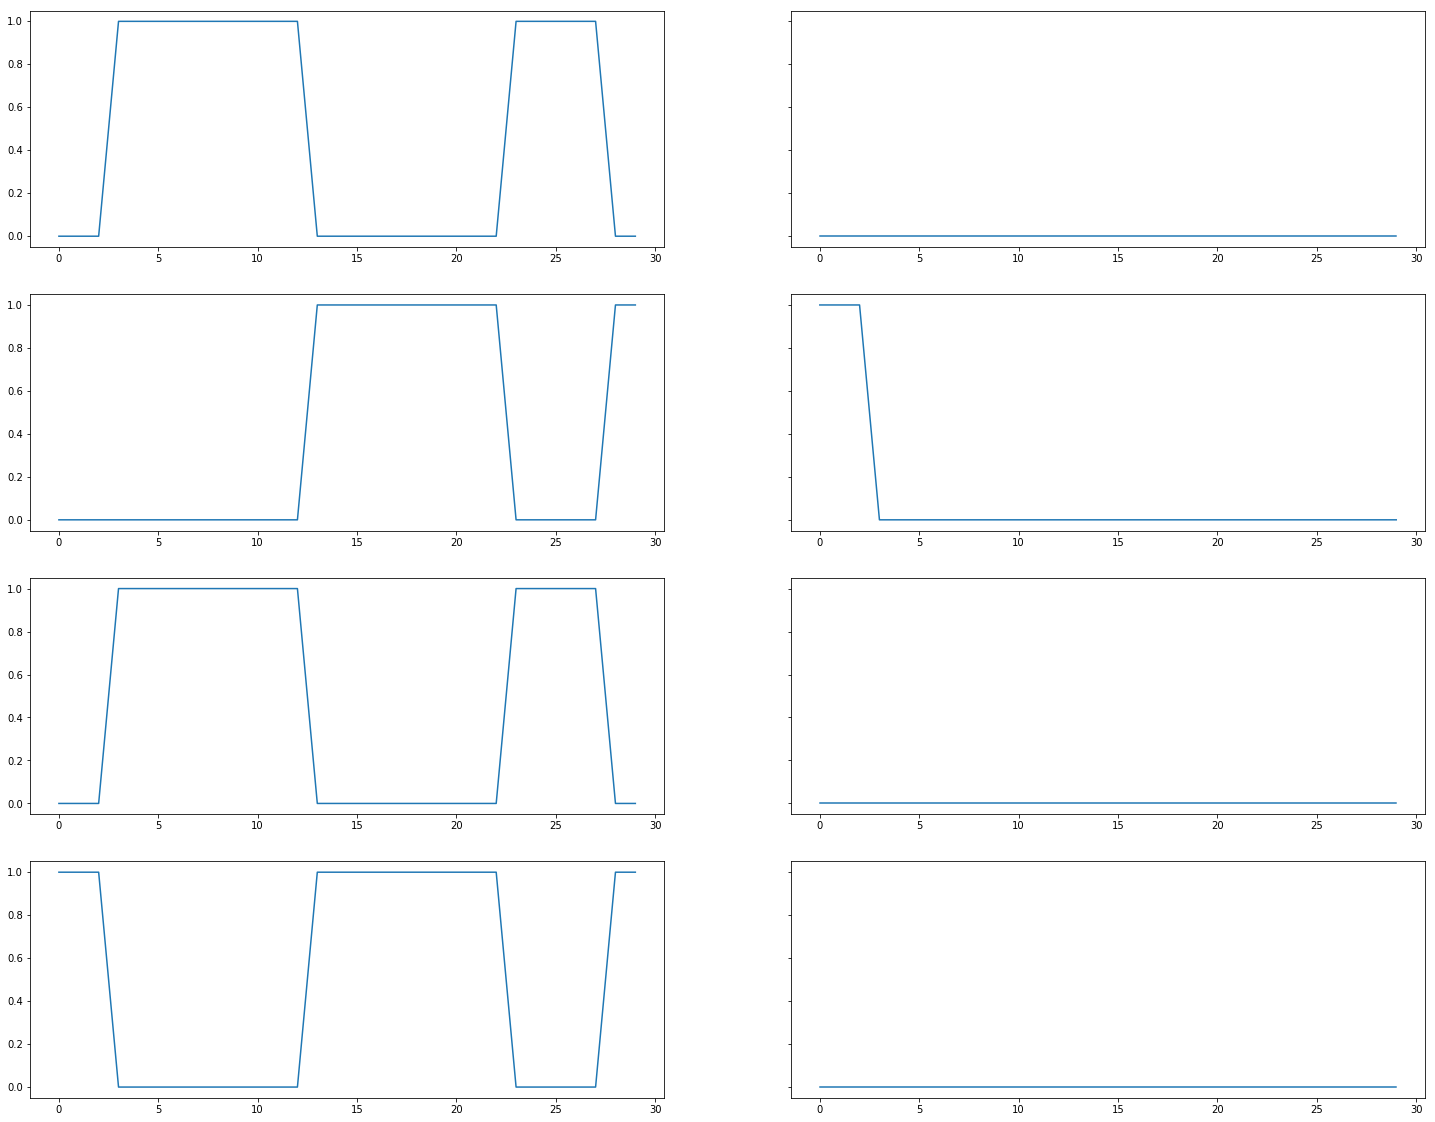

In [14]:
df_g_map = df_g.pivot(index='timestep', columns='cell', values='is_green')
throughs = [intToBinTuple(x) for x in [1,3,5,7]]
lefts = [intToBinTuple(x) for x in [0,2,4,6]]

_, axs = plt.subplots(4,2,figsize=(25,20), sharey=True)

for ndx, t in enumerate(throughs):
    sns.lineplot(data=df_g_map[t], ax=axs[ndx][0])
    
for ndx, l in enumerate(lefts):
    sns.lineplot(data=df_g_map[l], ax=axs[ndx][1])